In [ ]:
# Note that this works in the version tagged V0.1
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from Segment import Segment

In [2]:
# Now building a body out of the segments 

body = Segment(171380, 4.305, 59.539, "Torso")
body.add_child(51.70, Segment(17556.0, 13.423, 17.3, "Head"))
body.add_child(5.45, 
               Segment(9041.34, 0.814, 1.264, "LUArm").add_child(2.65,
               Segment(5739.14, 0.534, 0.271, "LFArm").add_child(1.20,
               Segment(1400.3, 0.369, 0.140, "LHand"))))
body.add_child(5.45, 
               Segment(9041.34, 0.814, 1.264, "RUArm").add_child(2.65,
               Segment(5739.14, 0.534, 0.271, "RFArm").add_child(1.20,
               Segment(1400.3, 0.369, 0.140, "RHand"))))
body.add_child(2.72, 
               Segment(29314.3, 1.640, 1.440, "LThigh").add_child(0.85,
               Segment(13973.7, 0.879, 0.380, "LLeg").add_child(0.56,
               Segment(2006.4, 0.456, 0.313, "LFoot"))))
body.add_child(2.72, 
               Segment(29314.3, 1.640, 1.440, "RThigh").add_child(0.85,
               Segment(13973.7, 0.879, 0.380, "RLeg").add_child(0.56,
               Segment(2006.4, 0.456, 0.313, "RFoot"))))

In [3]:
import copy

In [4]:
body_cp = copy.deepcopy(body)

In [5]:
tvals = []
for i in range(100000):
    A = body_cp.coeff_mat(1)
    c = body_cp.get_const(1, 25.0)
    ntemps = list(np.linalg.inv(A) @ c) # invert the matrix, finding temperatures
    tvals.append(copy.copy(ntemps))
    body_cp.set_temps(ntemps)

In [6]:
tvals = np.array(tvals)

In [12]:
names = body_cp.get_names() 

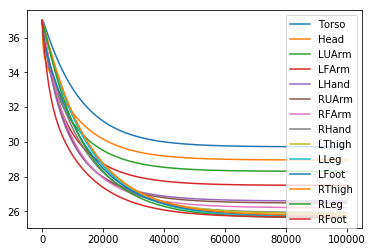

In [13]:
fig_t = plt.figure()
ax_t = fig_t.add_subplot(111)
for i, name in enumerate(names):
    ax_t.plot(tvals[:,i], label=name)

ax_t.legend()